# The Kolmogorov-Smirnov Test - Lab

## Introduction
In the previous lesson, we saw that the Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. In this lab, we shall see how to perform this test in python. 

## Objectives

You will be able to:
* Perform 1 sample and 2 sample KS tests in Python and Scipy
* Compare the KS test to visual approaches for checking normality assumptions
* Plot the CDF and ECDF to visualize parametric and empirical cumulative distribution functions

## Generate Data

### Let's import the necessary libraries and generate some data 

In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

### Plot Histograms and QQ plots of above datasets and comment on the output 

- How good are these techniques for checking normality assumptions?
- Compare both these techniques and identify their limitations/benefits etc. 


x_10 :


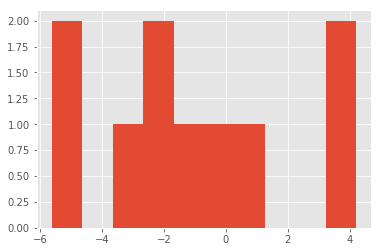

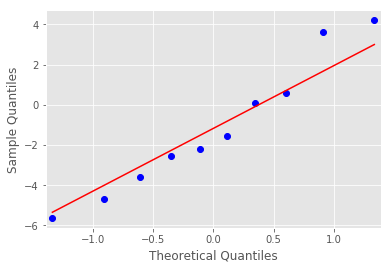

x_50 :


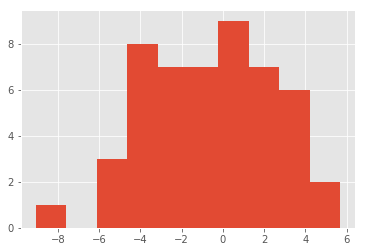

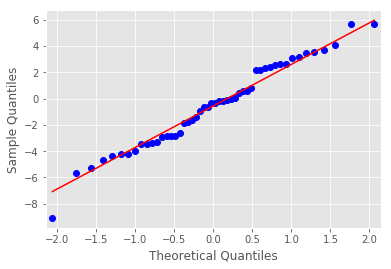

x_100 :


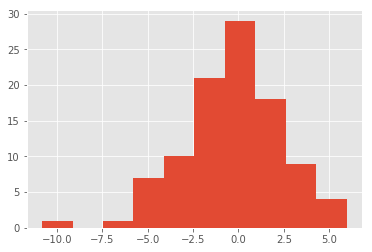

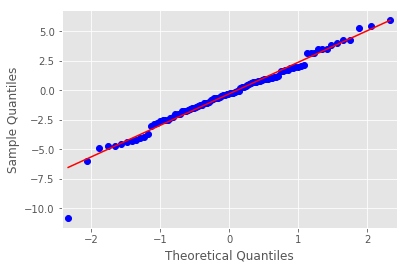

x_1000 :


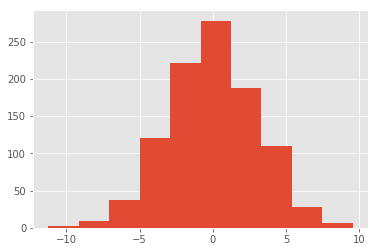

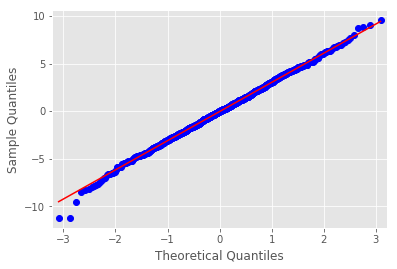

In [3]:
# Plot histograms and QQplots for above datasets

# You code here
name = ['x_10','x_50','x_100','x_1000']
for ind, idx in enumerate([x_10, x_50, x_100, x_1000]):
    print (name[ind],':')
    plt.hist(idx)
    sm.qqplot(idx, line='s')
    plt.show()

In [ ]:
# How good are these techniques for checking normality assumptions?
# Compare both these techniques and identify their limitations/benefits etc.

# You comments here 
# Histograms are good visual tools to inspect for symmetry, skewness, kurtosis, and outliers (non-normality).
# Histograms do not, however, provide a means to measure normality directly.

# QQ plots are a comparitively better visual tool; they provide a normal reference line to compare against. 
# QQ plots do not, however, provide a quantitative summary of the normality of the distribution.

# Outliers are evident in both plots. They start at their highest number in the x_10 plot and decrease with each distribution.

### Create a function to plot the normal CDF and ECDF for a given dataset
- Create a function ks_plot(data) to generate an empirical CDF from data
- Create a normal CDF using the same mean = 0 and sd = 3, having the same number of values as data

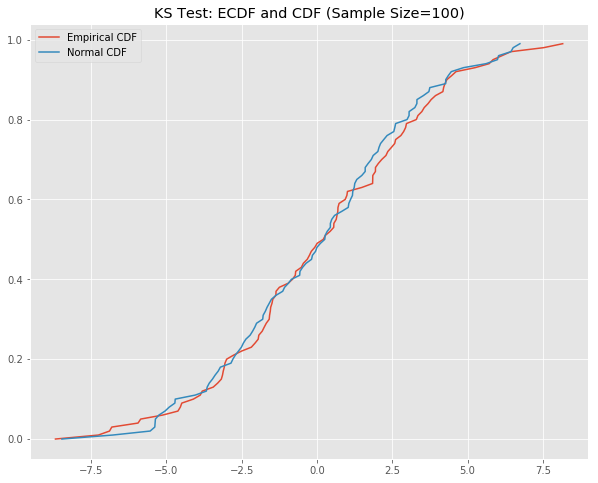

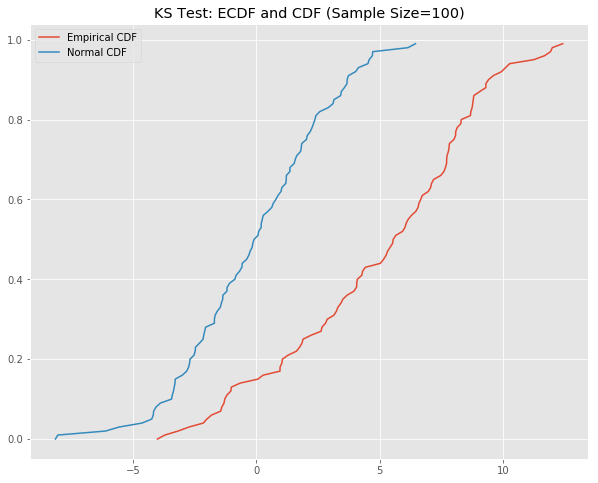

In [5]:
# You code here 

def ks_plot(data):

    plt.figure(figsize=(10, 8))
    plt.plot(np.sort(data), np.linspace(0, 1, len(data), endpoint=False))
    plt.plot(np.sort(stats.norm.rvs(loc=0, scale=3, size=len(data))), np.linspace(0, 1, len(data), endpoint=False))
    plt.legend(['Empirical CDF', 'Normal CDF'])
    plt.title('KS Test: ECDF and CDF (Sample Size=' + str(len(data)) + ')')
        
# Uncomment below to run the test
ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))

This is awesome. The difference between the two CDFs in the second plot shows that the sample did not come from the distribution which we tried to compare it against. 

### Now you can run all the generated datasets through the function ks_plot and comment on the output.

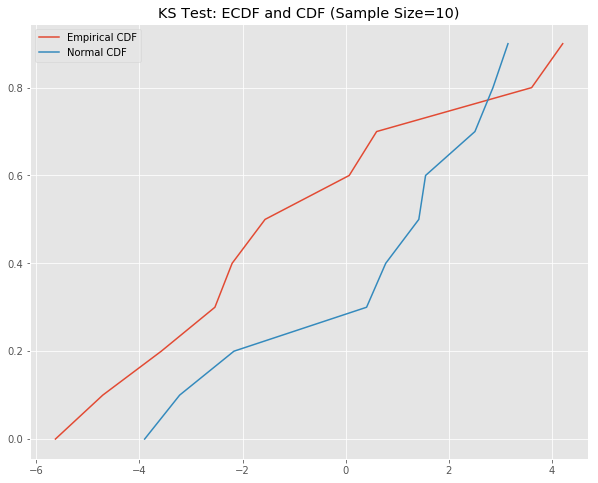

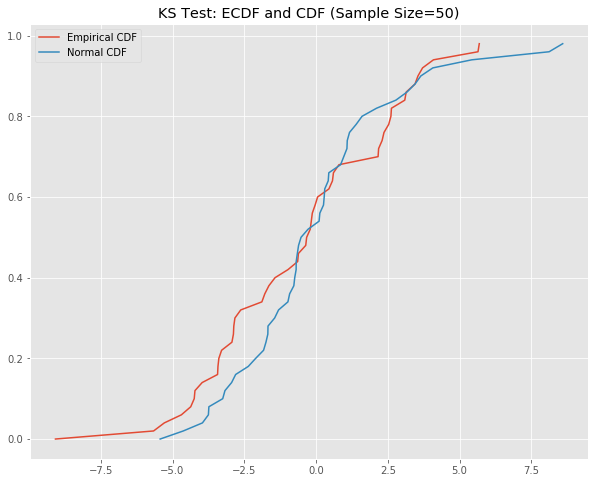

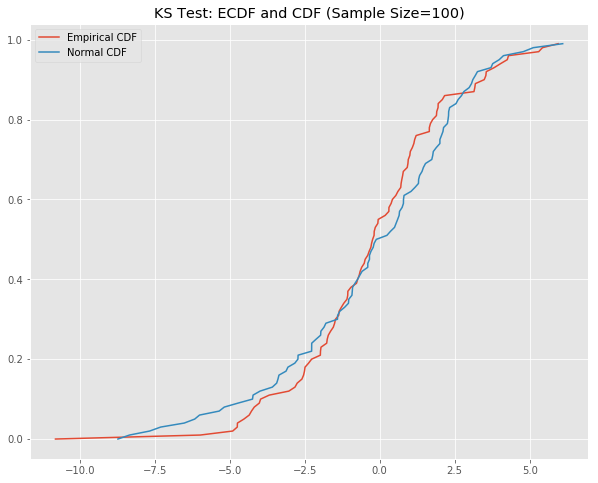

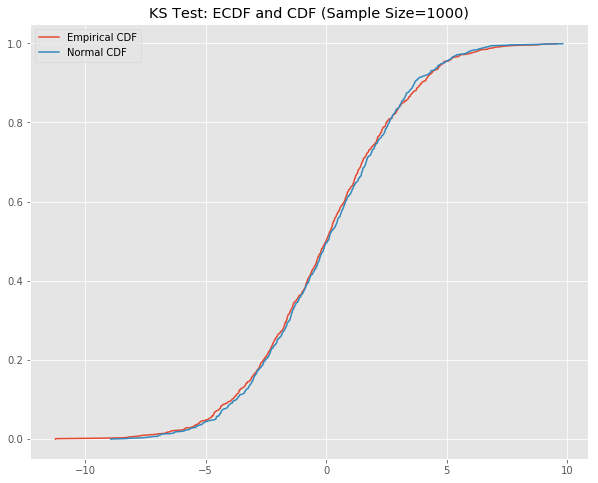

In [6]:
# Your code here 
ks_plot(x_10)
ks_plot(x_50)
ks_plot(x_100)
ks_plot(x_1000)

In [ ]:
# Your comments here 
# As the number of data points increases, the relationship between ECDF and CDF gets better.
# The smaller sample sizes would have a high d-statistic and may result in non-normal KS Test conlusions.

### KS test in SciPy

Let's run the Kolmogorov-Smirnov test, and use some statistics to get a final verdict on normality. It lets us test the hypothesis that the sample is a part of the standard t-distribution. In SciPy, we run this test using the method below:

```python
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
```
Details on arguments being passed in can be viewed at this [link to the official doc.](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)


### Run the KS test for normality assumption using the datasets created earlier and comment on the output
- Perform the KS test against a normal distribution with mean = 0 and sd = 3
- If p < .05 we can reject the null hypothesis and conclude our sample distribution is not identical to a normal distribution.

In [7]:
# Perform KS test 

# Your code here 
for i in [x_10, x_50, x_100, x_1000]:
    print (stats.kstest(i, 'norm', args=(0, 3)))
    
# KstestResult(statistic=0.1377823669421559, pvalue=0.9913389045954595)
# KstestResult(statistic=0.13970573965633104, pvalue=0.2587483380087914)
# KstestResult(statistic=0.0901015276393986, pvalue=0.37158535281797134)
# KstestResult(statistic=0.030748345486274697, pvalue=0.29574612286614443)

KstestResult(statistic=0.29885899044939124, pvalue=0.2749262265441436)
KstestResult(statistic=0.1490564115251774, pvalue=0.19601329997577926)
KstestResult(statistic=0.11281202049213712, pvalue=0.1452737384034533)
KstestResult(statistic=0.017843673158941475, pvalue=0.9077784078216501)


In [ ]:
# Your comments here 
# For all datasets the p-value greater than the critical threshold value of 0.05.
# Therefore, we resfuse to reject the Null Hypothesis and conclude that our samples are normal distributions.


### Generate a uniform distribution and plot / calculate the ks test against a uniform as well as a normal distribution

In [8]:
# Try with a uniform distribution
x_uni = np.random.rand(1000)

print(stats.kstest(x_uni, lambda x: x))
print(stats.kstest(x_uni, 'norm', args=(0, 3)))

# KstestResult(statistic=0.023778383763166322, pvalue=0.6239045200710681)
# KstestResult(statistic=0.5000553288071681, pvalue=0.0)

KstestResult(statistic=0.022604444510037736, pvalue=0.68645169666593)
KstestResult(statistic=0.5000561040703966, pvalue=9.366454453869445e-232)


In [ ]:
# Your comments here 
# When comparing against a uniform distribution, the p-value (0.69) is larger than the critical threshold value of 0.05.
# We refuse to reject the Null Hypothesis and conclude that our sample is uniformly distributed.

# When comparing against a normal distribution, the p-value (0.00) is smaller than the critical thrshold value of 0.05.In the second case, comparing a uniform distribution against a normal CDF, the p value - 0 
# We reject the Null Hypothesis and conclude that our sample is not normally distributed. 

## 2 sample KS test
A two sample KS test is available in SciPy using following function
```python 
scipy.stats.ks_2samp(data1, data2)[source]
```

Let's generate some bi-modal data first for this test 

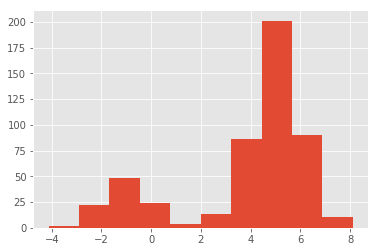

In [9]:
# Generate binomial data
N = 1000
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)), np.random.normal(5, 1, int(0.4 * N))))[:, np.newaxis]
plt.hist(x_1000_bi);

### Plot the CDFs for x_1000_bimodal and x_1000 and comment on the output 

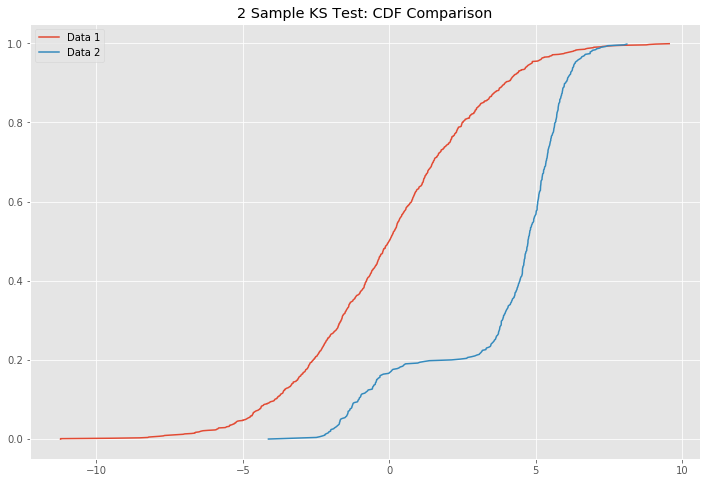

In [10]:

# Plot the CDFs
def ks_plot_2sample(data_1, data_2):
    '''
    Data entereted must be the same size.
    '''
    plt.figure(figsize=(12, 8))
    plt.plot(np.sort(data_1), np.linspace(0, 1, len(data_1), endpoint=False))
    plt.plot(np.sort(data_2), np.linspace(0, 1, len(data_2), endpoint=False))
    plt.legend(['Data 1', 'Data 2'])
    plt.title('2 Sample KS Test: CDF Comparison')

# Uncomment below to run
ks_plot_2sample(x_1000, x_1000_bi[:, 0])

In [ ]:
# You comments here 
# The two samples start highly divergent and then cross at high values of X. 
# It is reasonable to assume a high d-statistic and KS Test resulting in non-identical distributions.

### Run the two-sample KS test on x_1000 and x_1000_bi and comment on the results

In [11]:
# Your code here
stats.ks_2samp(x_1000, x_1000_bi[:,0])
# Ks_2sampResult(statistic=0.633, pvalue=4.814801487740621e-118)

Ks_2sampResult(statistic=0.632, pvalue=1.1321582237081334e-117)

In [ ]:
# Your comments here 
# The two-sample KS Test results in a very small p-value (0.00) much less than the critical threshold value of 0.05.
# We reject the null hypothesis and conclude that the two samples belog to different distributions.

## Summary

In this lesson, we saw how to check for normality (and other distributions) using one sample and two sample ks-tests. You are encouraged to use this test for all the upcoming algorithms and techniques that require a normality assumption. We saw that we can actually make assumptions for different distributions by providing the correct CDF function into Scipy KS test functions. 